# Capstone Project Part 11: Production Model And Insights

## Import Libraries And Modules

In [16]:
# Basic libraries
import pandas as pd

# Plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

---

## Load Data

Load `preprocessed.csv`, `predict.csv` and `feature_importance.csv` from `data` folder into a pandas DataFrame.

In [30]:
preprocessed = pd.read_csv('../data/preprocessed.csv')
predict = pd.read_csv('../data/predict.csv')
feature_importance = pd.read_csv('../data/feature_importance.csv')

---

## Plotting And Interpreting Best Model

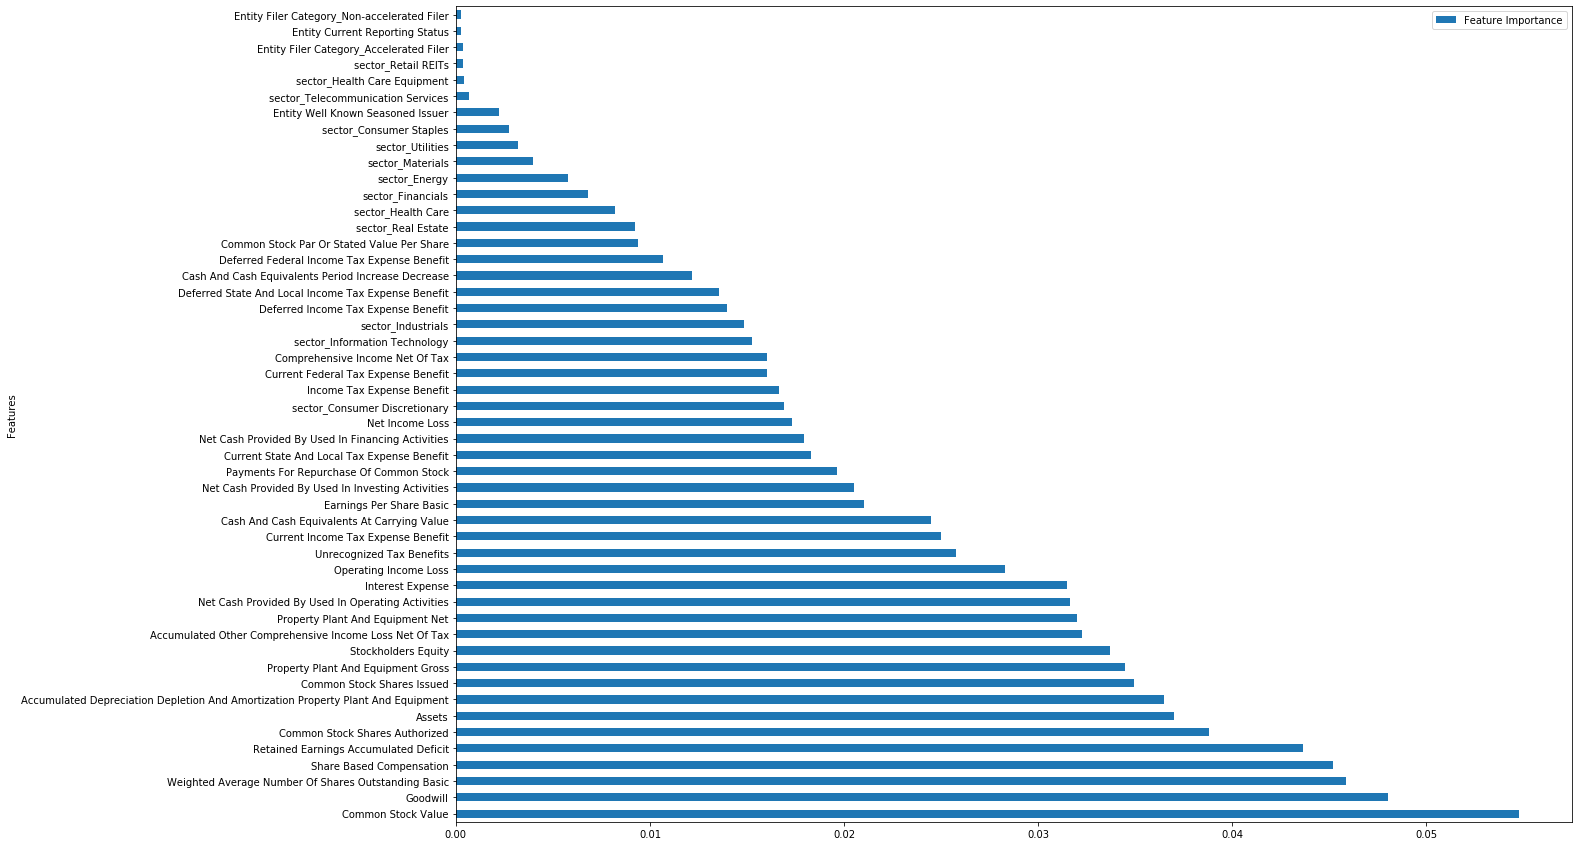

In [9]:
feature_importance.iloc[:50].plot.barh(
    x='Features', 
    figsize=(20, 15)
);

In [12]:
preprocessed.groupby('cap')[feature_importance.iloc[:7]['Features'].values].describe().T

cap                                                                0.0  \
Common Stock Value                                 count  1.918000e+03   
                                                   mean   4.004255e+08   
                                                   std    1.479519e+09   
                                                   min    0.000000e+00   
                                                   25%    8.650000e+04   
                                                   50%    3.000000e+06   
                                                   75%    6.214850e+07   
                                                   max    1.911600e+10   
Goodwill                                           count  1.918000e+03   
                                                   mean   4.972557e+09   
                                                   std    9.094506e+09   
                                                   min    0.000000e+00   
                                                   25%    4.110000e+08   
                                                   50%    1.722600e+09   
                                                   75%    5.362500e+09   
                                                   max    8.396800e+10   
Weighted Average Number Of Shares Outstanding B... count  1.918000e+03   
                                                   mean   5.615299e+08   
                                                   std    9.977096e+08   
                                                   min    0.000000e+00   
                                                   25%    1.356865e+08   
                                                   50%    2.847160e+08   
                                                   75%    5.369499e+08   
                                                   max    1.073116e+10   
Share Based Compensation                           count  1.918000e+03   
                                                   mean   1.628023e+08   
                                                   std    5.950160e+08   
                                                   min   -8.900000e+07   
                                                   25%    1.820000e+07   
                                                   50%    4.911600e+07   
                                                   75%    1.190000e+08   
                                                   max    9.353000e+09   
Retained Earnings Accumulated Deficit              count  1.918000e+03   
                                                   mean   9.875202e+09   
                                                   std    2.213760e+10   
                                                   min   -2.284100e+10   
                                                   25%    9.859000e+08   
                                                   50%    3.424728e+09   
                                                   75%    9.540400e+09   
                                                   max    1.849870e+11   
Common Stock Shares Authorized                     count  1.918000e+03   
                                                   mean   1.488952e+09   
                                                   std    2.622182e+09   
                                                   min    0.000000e+00   
                                                   25%    3.000000e+08   
                                                   50%    6.291500e+08   
                                                   75%    1.200000e+09   
                                                   max    3.000000e+10   
Assets                                             count  1.918000e+03   
                                                   mean   6.093557e+10   
                                                   std    2.232296e+11   
                                                   min    0.000000e+00   
                                                   25%    6.797430e+09   
    

In [19]:
xaxis = feature_importance.iloc[0]['Features']
yaxis = feature_importance.iloc[1]['Features']
target = 'cap'

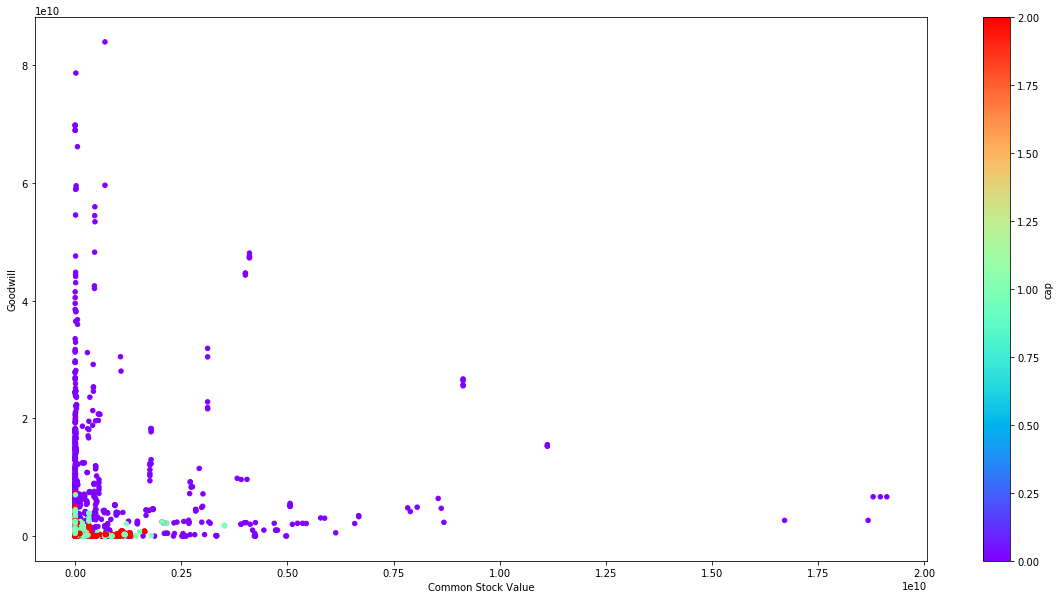

In [20]:
fig, ax = plt.subplots()
df.plot.scatter(
    x=xaxis, 
    y=yaxis,
    c=target,
    ax=ax,
    cmap='rainbow',
    figsize=(20, 10)
);

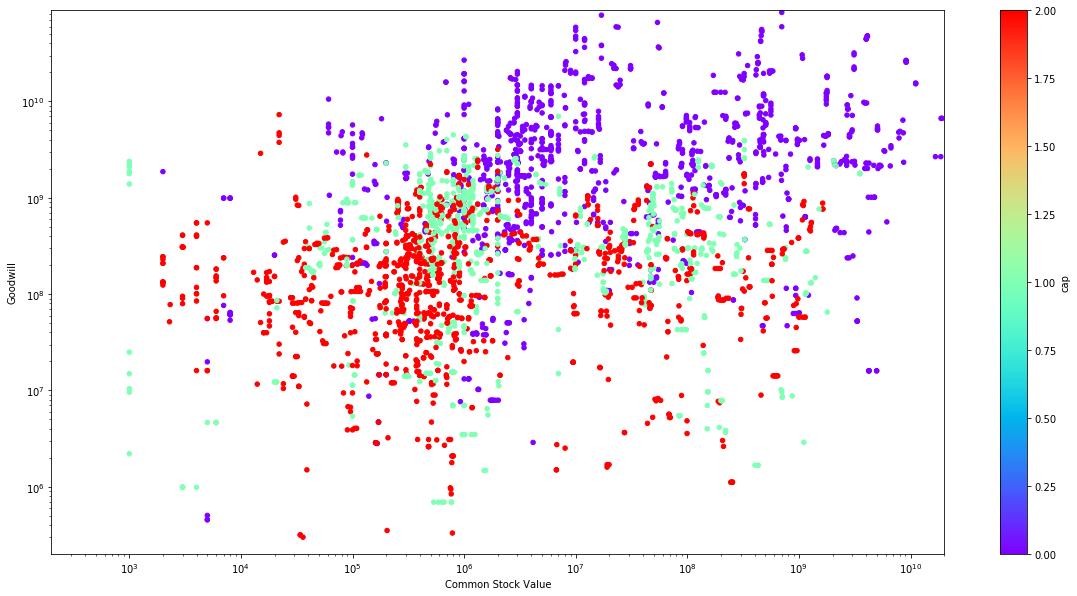

In [21]:
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax_log = plt.subplot()
df.plot.scatter(
    x=xaxis, 
    y=yaxis,
    c=target,
    ax=ax_log,
    cmap='rainbow',
    figsize=(20, 10)
)
ax_log.set_xscale('log')
ax_log.set_yscale('log')
ax_log.set_xlim((xlim[1] / 100_000_000, xlim[1])),
ax_log.set_ylim((xlim[1] / 100_000, ylim[1]));

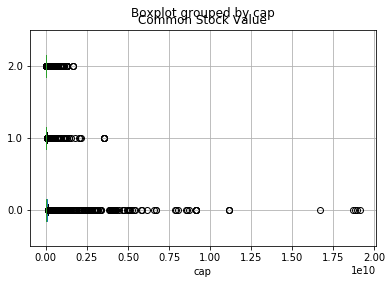

In [31]:
preprocessed.boxplot(column='Common Stock Value', by='cap', vert=False);

---

## Improvement To Model

- We could use more years of data (i.e. before 2009 and after 2019)